В этом ноутбуке кратко рассмотрим простейшие выстроенные в Python структуры данных. 

Структуры данных - форматы для организации и хранения данных. Этот «макет» позволяет структуре данных быть эффективной в некоторых операциях и неэффективной в других.

**Простейшие структуры данных Python**

| Type     | Example    | Description                  |
|----------|------------|------------------------------|
| `list`      | `[1, 2, 3]`      | списки - упорядоченные коллекции                   |
| `tuple`    | `(1, 2, 3)`    | кортежи - неизменяемые списки    |
| `dict`  | `{'a':1, 'b':2, 'c':3}`	 | неупорядоченные коллекции вида "ключ" - значение            |
| `set`     | 	`{1, 2, 3}`   | неупорядоченные коллекции - множества |

В Python по умолчанию не реализованы массивы, что решается сторонней, но уже практически базовой библиотекой **numpy**.

Также существуют другие структуры данных, например, в модуле COllections. О них можно почитать, например, [тут](https://pythonworld.ru/moduli/modul-collections.html)

# List
Структура вида "элемент-голова + указатель на следующий элемент". Полседний элемент просто указывает на None, за счёт чего к нему удобно добавить следующий элемент.
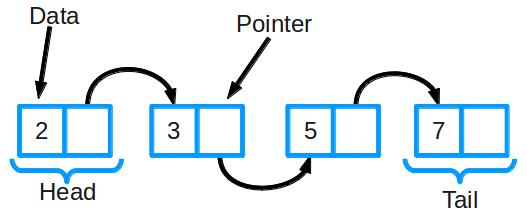

Списки  удобны, когда вам нужен "паровозик" данных, в котором вы будете проходиться по каждому вагону и, возможно, цеплять или убирать новые.

In [101]:
l = [2,3,5,7,11]

In [102]:
# действительно, из списка легко вытащить "голову" и "тело"
head, *body = l
# почему перед body стоит звёздочка, поговорим позже

In [103]:
head

2

In [104]:
body

[3, 5, 7, 11]

In [105]:
# можно, кстати, наоборот, вытащить тело с голоовой и последний элемент (ноги) списка
*head, body = l

In [106]:
head

[2, 3, 5, 7]

In [107]:
body

11

Массив - изменяемая структура в Python. Новый элемент списка добавляется методом **append**.

Тут проявляется динамическая типизация Python: в структуре данных могут содержаться данные разных типов.

In [108]:
# например, и числа, и строки
l.append("one more")

In [109]:
# это может быть удобно в "бытовой" практике, но является плохим тоном при разработке приложений
l

[2, 3, 5, 7, 11, 'one more']

In [110]:
# как и для строк, можем измерить длину списка
len(l)

6

использовать доступ к элементу по индексу (в т.ч. отрицательному)
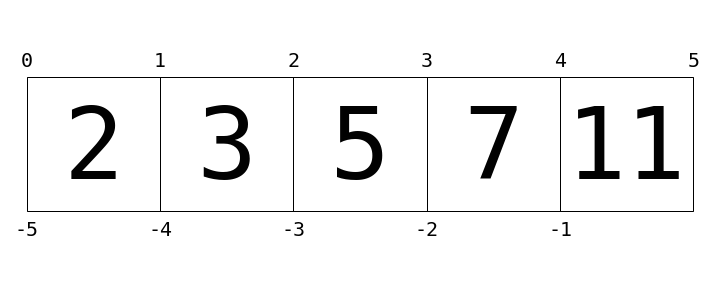

In [111]:
l[0], l[4], l[5]

(2, 11, 'one more')

In [112]:
l[-1]

'one more'

In [113]:
# срезы списка по индексу. Сам список l при этом не меняется.
l[1:5]

[3, 5, 7, 11]

In [114]:
# срезы через более чем один элемент.
# например, каждый второй элемент списка с индексом от 1 до 5
l[1:6:2]

[3, 7, 'one more']

In [115]:
# срезы в обратную сторону
l[-1:-5:-1]

['one more', 11, 7, 5]

In [116]:
# а также суммирование списков
l2 = l + ["element from another list"]
l2

[2, 3, 5, 7, 11, 'one more', 'element from another list']

In [117]:
# метод pop() "отрывает" у списка последний элемент. Например, было:
l

[2, 3, 5, 7, 11, 'one more']

In [118]:
l.pop()

'one more'

In [119]:
# стало
l

[2, 3, 5, 7, 11]

In [120]:
# либо тот элемент, который вы укажете. Например, нулевой (голову списка)
l.pop(0)

2

In [121]:
# стало
l

[3, 5, 7, 11]

In [122]:
# при этом, введённый выше список l2 был создан как новый объект, поэтому с ним ничего не произошло
l2

[2, 3, 5, 7, 11, 'one more', 'element from another list']

# Tuple
Кортежи - те же списки, только неизменяемые

In [123]:
t = (2,3,5,7,11)
t

(2, 3, 5, 7, 11)

In [124]:
# можно записывать без скобок
t = 2,3,5,7,11
t

(2, 3, 5, 7, 11)

In [126]:
# кортеж неизменяем, к нему нельзя добавить новый элемент
t.append("new element")

AttributeError: 'tuple' object has no attribute 'append'

In [128]:
# однако, если метод создаст новый объект, а не поменяет старый, то почему бы и нет
a = ("new element",)
t + a

(2, 3, 5, 7, 11, 'new element')

In [129]:
# сам кортеж t при этом не поменялся, сколько раз к нему что-то не прибавляй
t

(2, 3, 5, 7, 11)

In [130]:
# кортежи поддерживают те же операции доступа к элементам, что и списки
t[0:4]

(2, 3, 5, 7)

Не забывайте, что создание нового объекта требует выделения памяти. Процесс небыстрый, поэтому если вы захотите много раз увеличивать длину кортежа, создавая новый кортеж, это будет происходить медленно.

На практике проверим это.

## Зачем нам нужен такой объект?

Кортежи занимают меньше памяти и работают быстрее списков, если нам не нужно менять сам кортеж.

Чаще всего кортежи используются, когда нам нужно передать несколько аргументов функции.

Либо в функциях, возвращающих больше одного аргумента

О функциях потом, но вот пример:

In [134]:
def fsum(a, b, c): 
    ''' функция от трёх аргументов'''
    return a+b+c

fsum(5, 6, 7)

18

In [135]:
# мы можем обозначить 5, 6, 7 разным целочисленным переменным, подставить их в функцию и получить тот же ответ

v1 = 5
v2 = 6
v3 = 7

# либо, что то же самое
v1, v2, v3 = 5, 6, 7

fsum(v1, v2, v3)

18

In [136]:
# либо можем подставить в функицию кортеж одной переменной, предварительно "раскрыв его" операцией "*"
# воспринимайте "*" как удаление скобок вокруг кортежа

t1 = (5, 6, 7)
fsum(*t1)

18

In [137]:
def algebraic_operators(a): 
    ''' функция, которая возвращает 3 элемента'''
    return a+a, a*a, a**a

algebraic_operators(3)

(6, 9, 27)

In [138]:
type(algebraic_operators(3))

tuple

In [139]:
# таже список можно явным образом преобразовать в кортеж
tuple([1, 2, 3, 4])

(1, 2, 3, 4)

# Dictionary
Удобная изменяемая структура вида ключ-значение
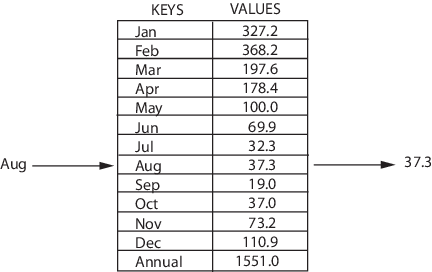

Для ускорения работы в Python словари на самом деле реализованы как хеш-таблицы, что позволяет им работать быстрее, но занимая больше памяти.

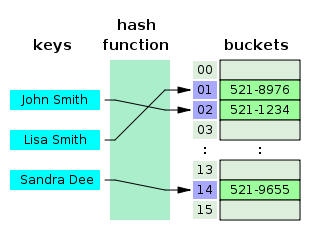

На практике используем словари для разгадывания Римского шифра

In [141]:
my_dict = {'key1':'value1', 'key2':'value2', 'key3':'value3'}

In [142]:
# доступ к элементам осуществляется по ключам
my_dict['key2']

'value2'

In [143]:
# В качестве ключа может использоваться любой "хешируемый" (т.е. чаще всего неизменяемый) тип или структура данных. Даже кортеж!
my_dict = {(1,2,3): 1}
my_dict[(1,2,3)]

1

In [144]:
# список уже не может быть ключом, т.к. если мы изменим список, изменится и хеш, по которому Python находит значение в словаре
my_dict = {[1,2,3]: 1}

TypeError: unhashable type: 'list'

In [145]:
# но может быть значеним в словаре
# к которому, кстати, можно сразу применить срез или доступ по индексу

my_dict = {'key1':'value1', 'key2':'value2', 'key3':[1, 2, 3]}
my_dict['key3'][0:2]

[1, 2]

Словари - неупорядоченные структуры. В будущем, попытавшись пройти по словарю циклом, вы можете сделать это не в том же порядке, в котором вы определяли словарь.

In [146]:
# В словарь можно добавить новую пару ключ-значение
my_dict['key10050'] = "new value"
my_dict

{'key1': 'value1',
 'key2': 'value2',
 'key3': [1, 2, 3],
 'key10050': 'new value'}

In [147]:
# можно получить список всех ключей
my_dict.keys()

dict_keys(['key1', 'key2', 'key3', 'key10050'])

In [148]:
# или всех значений
my_dict.values()

dict_values(['value1', 'value2', [1, 2, 3], 'new value'])

# Set

Множества - просто алгебраические множества. Неупорядоченные изменяемые структуры, к которым удобно применять операции на множествах - объединение, пересечение, сложение, вычитание, симметричное вычитание

In [149]:
myset = {1,2,3}
myset

{1, 2, 3}

In [150]:
# множества удобно создавать, явно преобразовывая из других структур с помощью функции set()
myset = set([1,2,3])

In [151]:
# элементы добавляются методом add()
myset.add(4)
myset

{1, 2, 3, 4}

In [152]:
# что будет, если добавить к множеству элемент, который в нём уже есть?
myset.add(4)
# спойлер: ничего не будет
myset

{1, 2, 3, 4}

In [153]:
# в множестве нет повторяющихся элементов, поэтому нередко это простой способ быстро убить все повторяющиеся элементы в структуре
myset = set([1,1,1,1,1,1,1,2,2,2,2,2,3])
myset

{1, 2, 3}

In [154]:
primes = {2, 3, 5, 7}
odds = {1, 3, 5, 7, 9}

In [155]:
# основные операции над множествами можно осуществлять как с помощью операторов |, &, +, -, ^, так и с помощью методов
primes | odds      # with an operator
primes.union(odds)

{1, 2, 3, 5, 7, 9}

In [156]:
primes & odds             # with an operator
primes.intersection(odds)

{3, 5, 7}

In [157]:
primes - odds           # with an operator
primes.difference(odds)

{2}

In [158]:
primes ^ odds                     # with an operator
primes.symmetric_difference(odds) 

{1, 2, 9}